In [25]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [26]:
IMAGE_SHAPE=(224,224)

In [27]:
import pathlib
data_dir=pathlib.Path("/home/sanjana/Desktop/medical_imaging/cervical-cancer")
data_dir

PosixPath('/home/sanjana/Desktop/medical_imaging/cervical-cancer')

In [28]:
list(data_dir.glob('*/*jpg'))[:5]

[PosixPath('/home/sanjana/Desktop/medical_imaging/cervical-cancer/LSIL/LSIL_4 (6).jpg'),
 PosixPath('/home/sanjana/Desktop/medical_imaging/cervical-cancer/LSIL/LSIL_1 (20).jpg'),
 PosixPath('/home/sanjana/Desktop/medical_imaging/cervical-cancer/LSIL/LSIL_4 (31).jpg'),
 PosixPath('/home/sanjana/Desktop/medical_imaging/cervical-cancer/LSIL/LSIL_3 (27).jpg'),
 PosixPath('/home/sanjana/Desktop/medical_imaging/cervical-cancer/LSIL/LSIL_1 (16).jpg')]

In [29]:
image_count=len(list(data_dir.glob('*/*jpg')))
image_count

962

In [30]:
lesions_dict={
    'NILM': list(data_dir.glob('NILM/*')),
    'LSIL': list(data_dir.glob('LSIL/*')),
    'HSIL': list(data_dir.glob('HSIL/*')),
    'SCC': list(data_dir.glob('SCC/*')),
}

In [31]:
lesions_labels={
    'NILM': 0,
    'LSIL': 1,
    'HSIL': 2,
    'SCC': 3,
}

In [32]:
x, y=[],[]
for lesions_name, images in lesions_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        x.append(img)
        y.append(lesions_labels[lesions_name])

In [33]:
x=np.array(x)
y=np.array(y)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [35]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

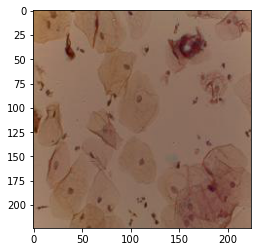

In [37]:
plt.imshow(x[100])

In [38]:
classifier="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
mod=hub.KerasLayer(classifier, input_shape=(224,224,3), trainable=False)

In [39]:
num_lesions=4
model=tf.keras.Sequential([
    mod, tf.keras.layers.Dense(num_lesions)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 4008      
Total params: 3,544,273
Trainable params: 4,008
Non-trainable params: 3,540,265
_________________________________________________________________


In [42]:
model.compile(
    optimizer="adam", 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(x_train_scaled, y_train, epochs=20)

Train on 721 samples
Epoch 1/20
721/721 [==============================] - 15s 21ms/sample - loss: 0.0563 - acc: 0.9861
Epoch 2/20
721/721 [==============================] - 14s 19ms/sample - loss: 0.0445 - acc: 0.9889
Epoch 3/20
721/721 [==============================] - 13s 17ms/sample - loss: 0.0360 - acc: 0.9931
Epoch 4/20
721/721 [==============================] - 12s 17ms/sample - loss: 0.0398 - acc: 0.9861
Epoch 5/20
721/721 [==============================] - 12s 17ms/sample - loss: 0.0251 - acc: 0.9958
Epoch 6/20
721/721 [==============================] - 12s 17ms/sample - loss: 0.0207 - acc: 0.9972
Epoch 7/20
721/721 [==============================] - 13s 17ms/sample - loss: 0.0189 - acc: 0.9972
Epoch 8/20
721/721 [==============================] - 12s 17ms/sample - loss: 0.0160 - acc: 1.0000
Epoch 9/20
721/721 [==============================] - 13s 18ms/sample - loss: 0.0153 - acc: 0.9986
Epoch 10/20
721/721 [==============================] - 12s 17ms/sample - loss: 0.0133 - 

In [43]:
model.evaluate(x_test_scaled, y_test)

241/241 [==============================] - 5s 21ms/sample - loss: 0.1109 - acc: 0.9627


[0.11090201590813047, 0.9626556]